In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import functions as func

Importing all 4 datasets, renaming them and adding type column for further analyses.

In [5]:
csv_file_path = r'Red.csv'
df_original_red = pd.read_csv(csv_file_path)
df_red = df_original_red.copy()
df_red.rename(columns={'Name': 'name', 'Country' : 'country', 'Region' : 'region', 'Winery' : 'winery', 'Rating' : 'rating', 'Price' : 'price', 'NumberOfRatings' : 'no_ratings', 'Year' : 'year'}, inplace=True)
df_red['type'] = 'red'
df_red.to_csv('red_clean.csv', index=False)

csv_file_path = r'White.csv'
df_original_white = pd.read_csv(csv_file_path)
df_white = df_original_white.copy()
df_white.rename(columns={'Name': 'name', 'Country' : 'country', 'Region' : 'region', 'Winery' : 'winery', 'Rating' : 'rating', 'Price' : 'price', 'NumberOfRatings' : 'no_ratings', 'Year' : 'year'}, inplace=True)
df_white['type'] = 'white'
df_white.to_csv('white_clean.csv', index=False)

csv_file_path = r'Sparkling.csv'
df_original_spark = pd.read_csv(csv_file_path)
df_spark = df_original_spark.copy()
df_spark.rename(columns={'Name': 'name', 'Country' : 'country', 'Region' : 'region', 'Winery' : 'winery', 'Rating' : 'rating','Price' : 'price', 'NumberOfRatings' : 'no_ratings', 'Year' : 'year'}, inplace=True)
df_spark['type'] = 'sparkling'
df_spark.to_csv('sparkling_clean.csv', index=False)

csv_file_path = r'Rose.csv'
df_original_rose = pd.read_csv(csv_file_path)
df_rose = df_original_rose.copy()
df_rose.rename(columns={'Name': 'name', 'Country' : 'country', 'Region' : 'region', 'Winery' : 'winery', 'Rating' : 'rating', 'Price' : 'price','NumberOfRatings' : 'no_ratings', 'Year' : 'year'}, inplace=True)
df_rose['type'] = 'rose'
df_rose.to_csv('rose_clean.csv', index=False)

Combining all 4 datasets and sorting them on year.

In [6]:
combined_df = pd.concat([df_red, df_white, df_spark, df_rose])
combined_df.sort_values(by='year', inplace = True)
combined_df.to_csv('combined_clean.csv', index=False)

First lineair correlation check, here the extreme value's are still in the set.

In [7]:
correlation = combined_df['rating'].corr(combined_df['price'])
print(correlation)

0.45065389968862485


Correlation plot withouth the extreme value's.

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     8275.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:12:33   Log-Likelihood:                 1076.0
No. Observations:               13621   AIC:                            -2148.
Df Residuals:                   13619   BIC:                            -2133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7044      0.003   1449.523      0.0

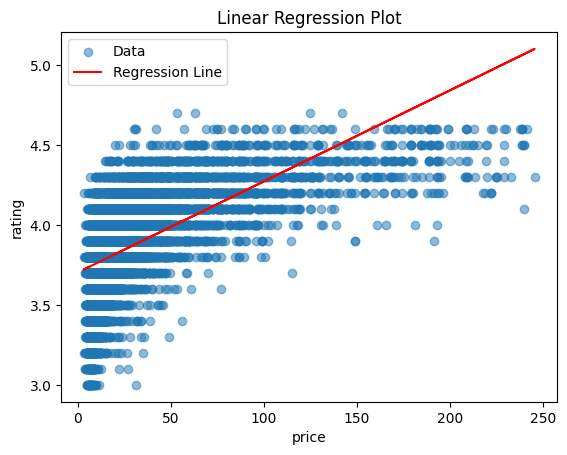

In [8]:
z_scores_price = stats.zscore(combined_df['price'])
z_scores_points = stats.zscore(combined_df['rating'])
threshold = 3

df_z_score = combined_df[(abs(z_scores_price) < threshold) & (abs(z_scores_points) < threshold)]

X = df_z_score['price']
y = df_z_score['rating']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

plt.scatter(X['price'], y, alpha=0.5, label='Data')
plt.plot(X['price'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('price')
plt.ylabel('rating')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

As seen above the dot follows a logarithmic curve. This is why we decided to apply a logarithmic transformation to have a better fit.

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:12:34   Log-Likelihood:                -11637.
No. Observations:               13621   AIC:                         2.328e+04
Df Residuals:                   13619   BIC:                         2.329e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4778      0.089    -84.135      0.0

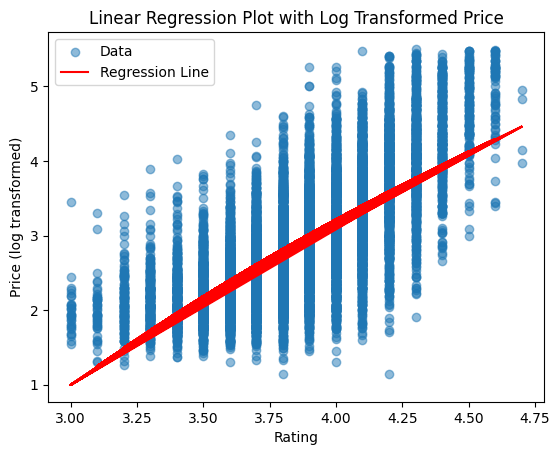

In [9]:
df_log = df_z_score.copy()


df_log['rating_log'] = np.log(df_log['rating'])
df_log['price_log'] = np.log(df_log['price'])


X_log = df_log['rating_log']
y_log = df_log['price_log']


X_log = sm.add_constant(X_log)


model_log = sm.OLS(y_log, X_log).fit()


print(model_log.summary())


plt.scatter(df_log['rating'], y_log, alpha=0.5, label='Data')
plt.plot(df_log['rating'], model_log.predict(X_log), color='red', label='Regression Line')
plt.xlabel('Rating')
plt.ylabel('Price (log transformed)')
plt.title('Linear Regression Plot with Log Transformed Price')
plt.legend()
plt.savefig('rating_price_corr.png')
plt.show()

Adding the average rating and price, also add the rating/price ratio for price quality analyses.

In [10]:
avg_price_rating_per_country = combined_df.groupby('country').agg({'price':'mean', 'rating':'mean'}).reset_index()

avg_price_rating_per_country['rating_per_price_ratio'] = avg_price_rating_per_country['rating'] / avg_price_rating_per_country['price']

avg_price_rating_per_country = avg_price_rating_per_country.rename(columns={'price':'avg_price', 'rating':'avg_rating', 'country':'country'})

avg_price_rating_per_country = avg_price_rating_per_country.sort_values(by='avg_rating', ascending=False)


First plot showing the average rating per country in the dataset of all 4 (red, white, sparkling and rose) wines.

C:\Users\gijsv\AppData\Local\Temp\ipykernel_13484\1625656860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='country', data=avg_price_rating_per_country, palette='viridis')


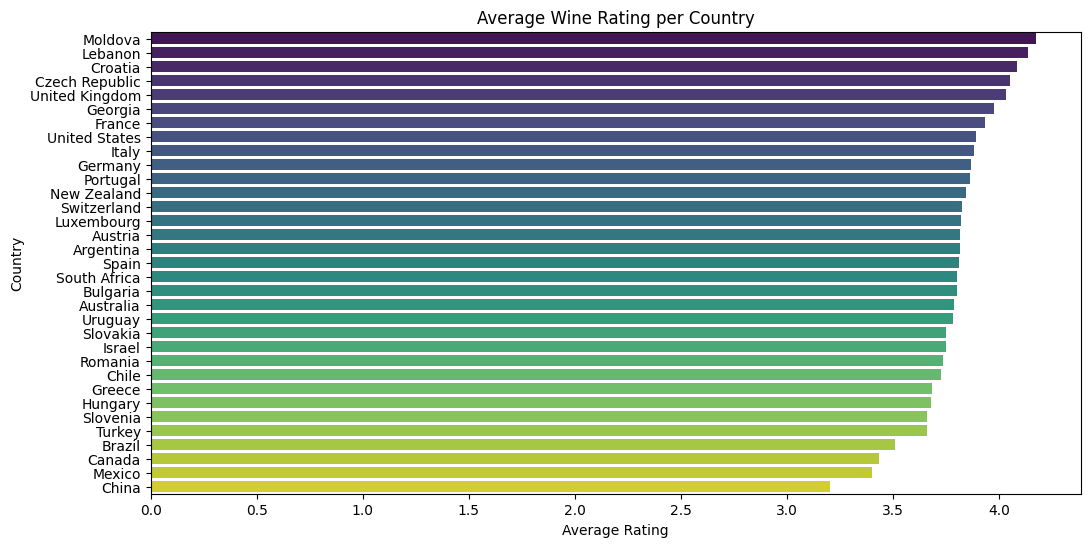

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_rating', y='country', data=avg_price_rating_per_country, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.title('Average Wine Rating per Country')
plt.show()

Here we have a plot showing the highest average rating/price ratio's.

C:\Users\gijsv\AppData\Local\Temp\ipykernel_13484\554953795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_per_price_ratio', y='country', data=avg_price_rating_per_country, palette='viridis')


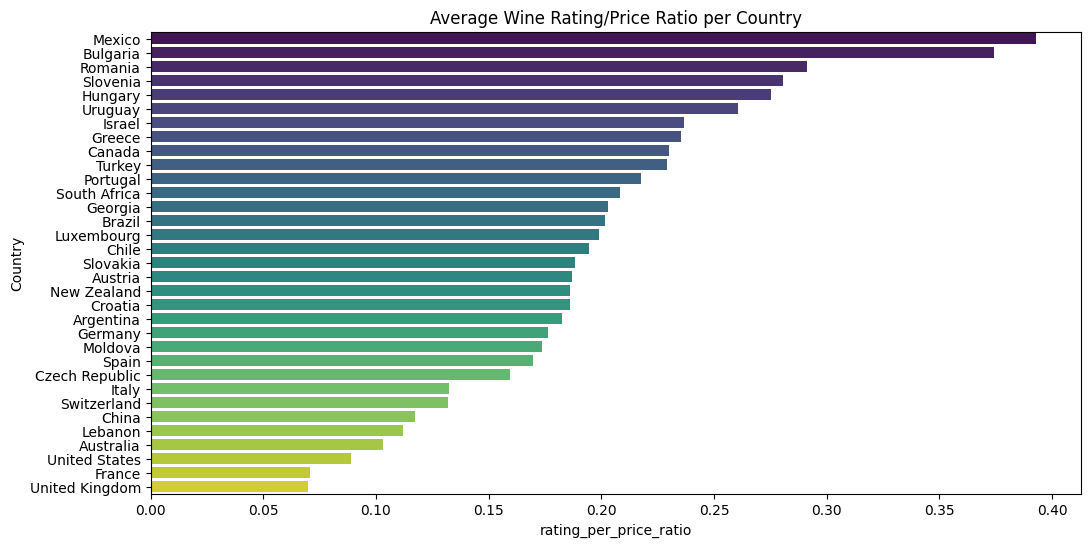

In [12]:
avg_price_rating_per_country = avg_price_rating_per_country.sort_values(by='rating_per_price_ratio', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='rating_per_price_ratio', y='country', data=avg_price_rating_per_country, palette='viridis')
plt.xlabel('rating_per_price_ratio')
plt.ylabel('Country')
plt.title('Average Wine Rating/Price Ratio per Country')
plt.show()

With the use of a function from the py file here we get substract all the wines from the countries of interest adding the average rating per region.

In [13]:
countries_of_interest = ['France', 'Italy', 'Spain', 'Portugal']
avg_price_rating_per_region = func.avg_and_ratio(combined_df, countries_of_interest)

In the next function we filter for the top 5 regions from the countries of interest.

In [14]:
top_regions_per_country = func.top_regions_rating(avg_price_rating_per_region)

Here a plot of the top 5 regions for the country of interest by average rating.

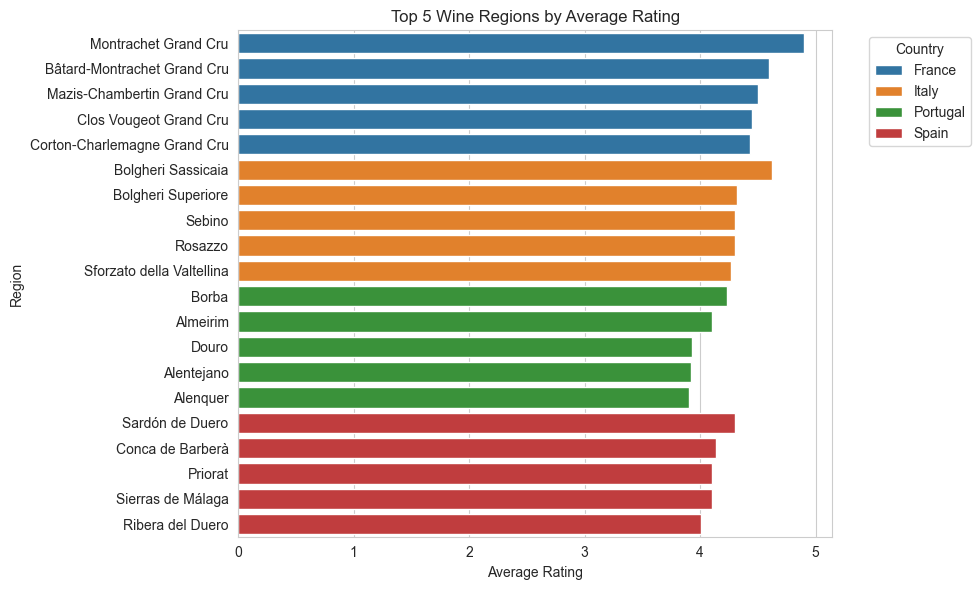

In [15]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='avg_rating', y='region', hue='country', data=top_regions_per_country)
plt.title('Top 5 Wine Regions by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('combined_rating.png')
plt.show()

In the next function we compute all the average ratings/price ratios for the top 5 regions from the countries of interest.

In [16]:
top_regions_ratio_country = func.top_regions_ratio(avg_price_rating_per_region)

Here a plot of the top 5 regions for the country of interest by average rating/price ratio's.

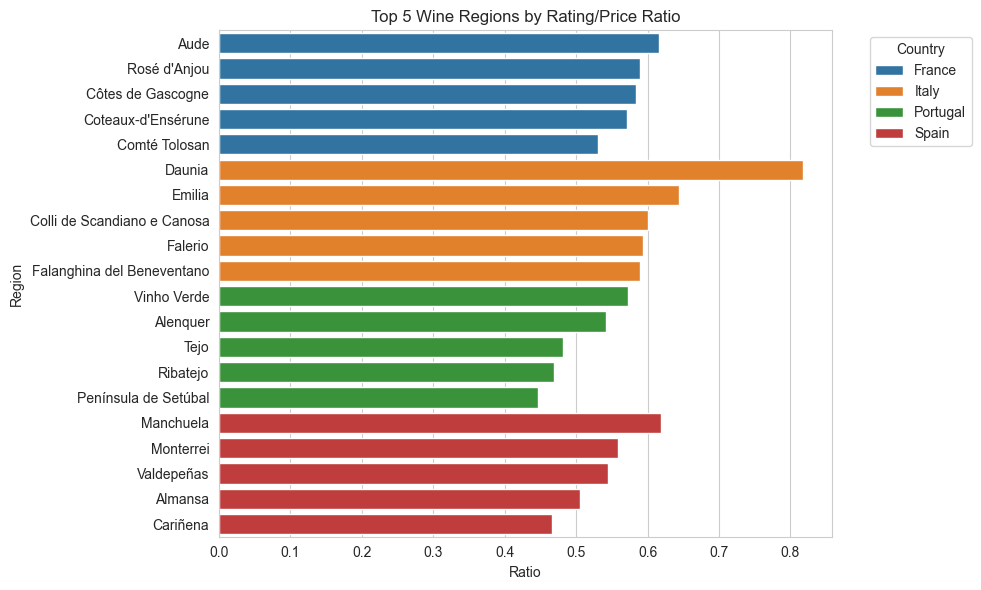

In [17]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='rating/price_ratio', y='region', hue='country', data=top_regions_ratio_country)
plt.title('Top 5 Wine Regions by Rating/Price Ratio')
plt.xlabel('Ratio')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('combined_ratio.png')
plt.show()

In the next function we compute all the average ratings of red wines from the countries of interest.

In [18]:
avg_price_rating_per_region_red = func.avg_and_ratio(df_red, countries_of_interest)

Here we filter for the top 5 regions by average rating from the red wines

In [19]:
top_regions_per_country_red = func.top_regions_rating(avg_price_rating_per_region_red)

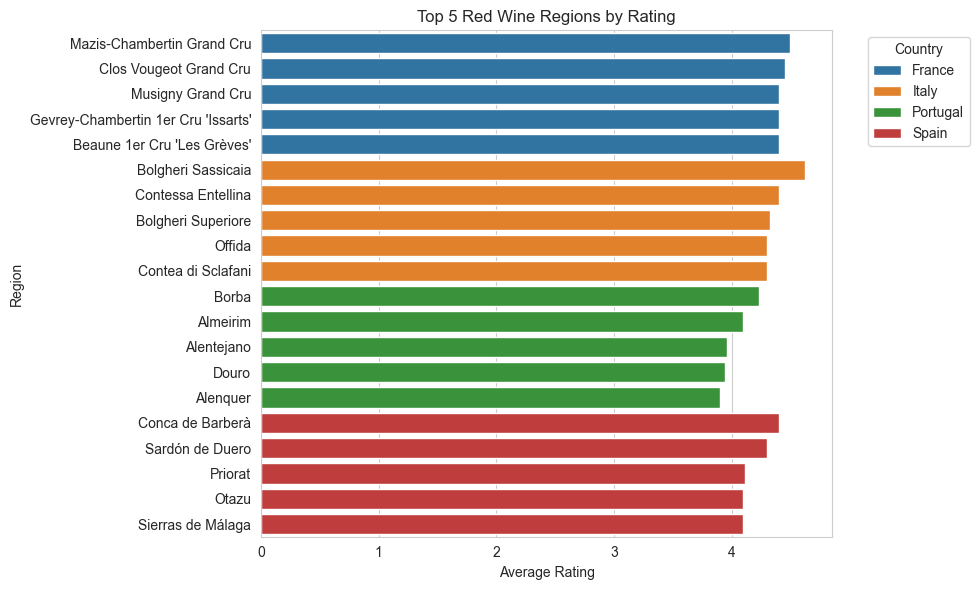

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_rating', y='region', hue='country', data=top_regions_per_country_red)
plt.title('Top 5 Red Wine Regions by Rating')
plt.xlabel('Average Rating')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('red_rating.png')
plt.show()

Here we filter the top 5 regions by rating/price ratio for red wines.

In [21]:
top_regions_ratio_country_red = func.top_regions_ratio(avg_price_rating_per_region_red)

Plot of top 5 regions by rating/price ratio of red wines.

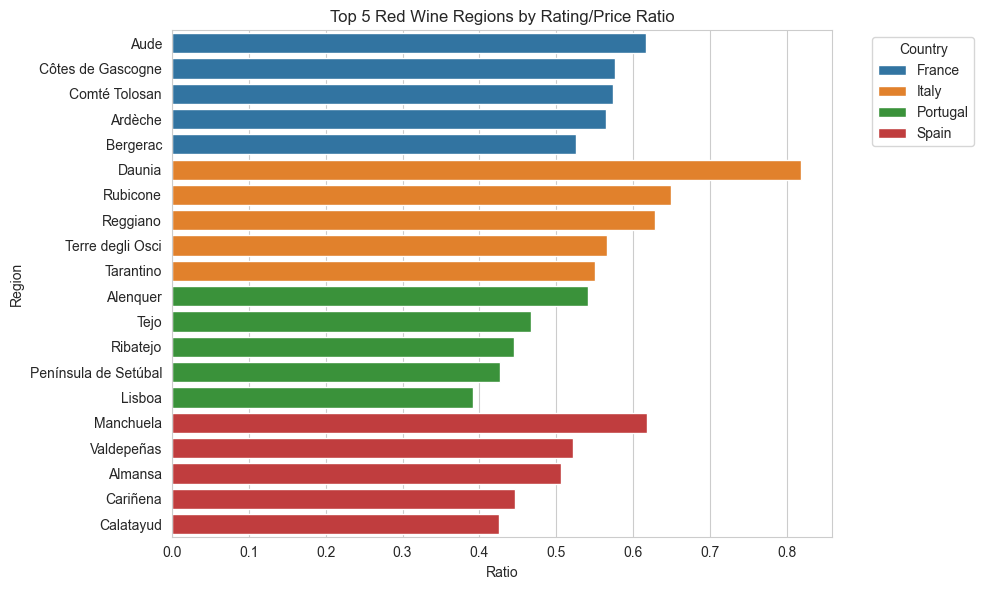

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='rating/price_ratio', y='region', hue='country', data=top_regions_ratio_country_red)
plt.title('Top 5 Red Wine Regions by Rating/Price Ratio')
plt.xlabel('Ratio')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('red_ratio.png')
plt.show()

In the next function we compute all the average ratings of white wines from the countries of interest.

In [23]:
avg_price_rating_per_region_white = func.avg_and_ratio(df_white, countries_of_interest)

Here we filter the top 5 regions by rating for white wines.

In [24]:
top_regions_per_country_white = func.top_regions_rating(avg_price_rating_per_region_white)

Plot of top 5 regions by rating for white wines

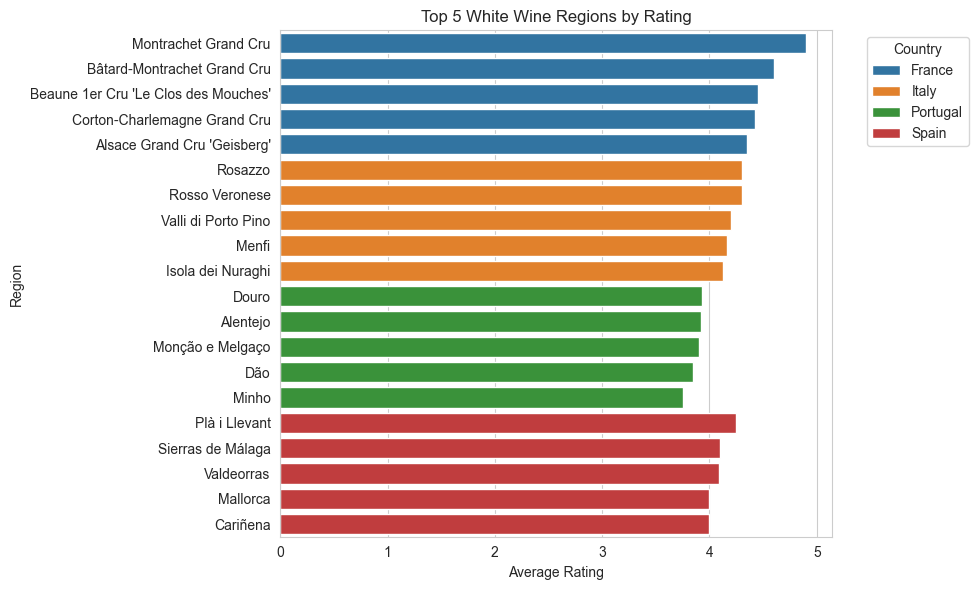

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_rating', y='region', hue='country', data=top_regions_per_country_white)
plt.title('Top 5 White Wine Regions by Rating')
plt.xlabel('Average Rating')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('white_rating.png')
plt.show()

Here we filter the top 5 regions by rating/price ratio for white wines.

In [26]:
top_regions_ratio_country_white = func.top_regions_ratio(avg_price_rating_per_region_white)

Plot of top 5 regions by rating/price ratios for white wines

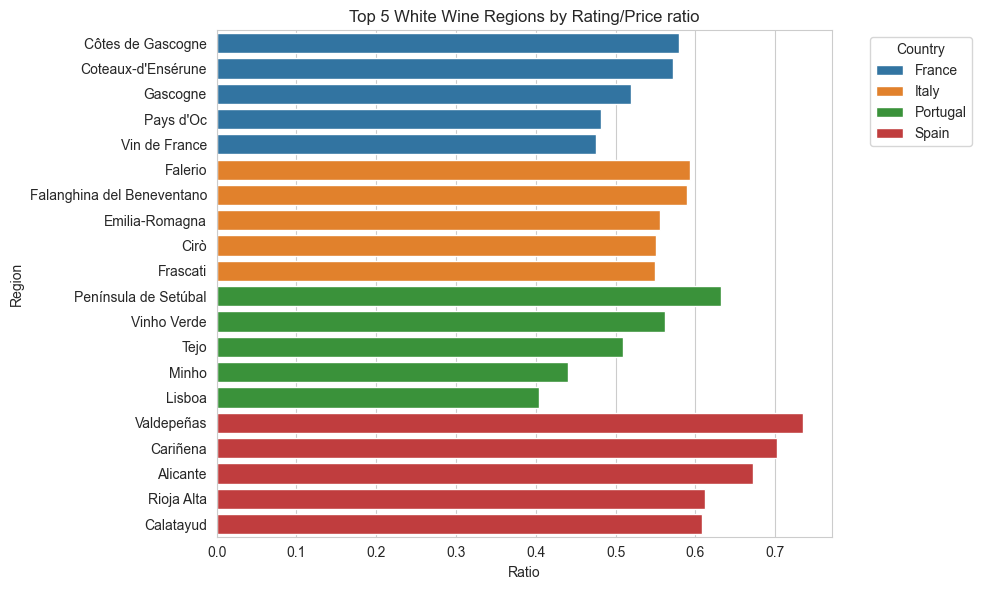

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='rating/price_ratio', y='region', hue='country', data=top_regions_ratio_country_white)
plt.title('Top 5 White Wine Regions by Rating/Price ratio')
plt.xlabel('Ratio')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('white_ratio.png')
plt.show()

In the next function we compute all the average ratings of sparkling wines from the countries of interest.

In [28]:
avg_price_rating_per_region_spark = func.avg_and_ratio(df_spark, countries_of_interest)

Here we filter the top 5 regions by rating for sparkling wines.

In [29]:
top_regions_per_country_spark = func.top_regions_rating(avg_price_rating_per_region_spark)

Plot of top 5 regions by rating for sparkling wines

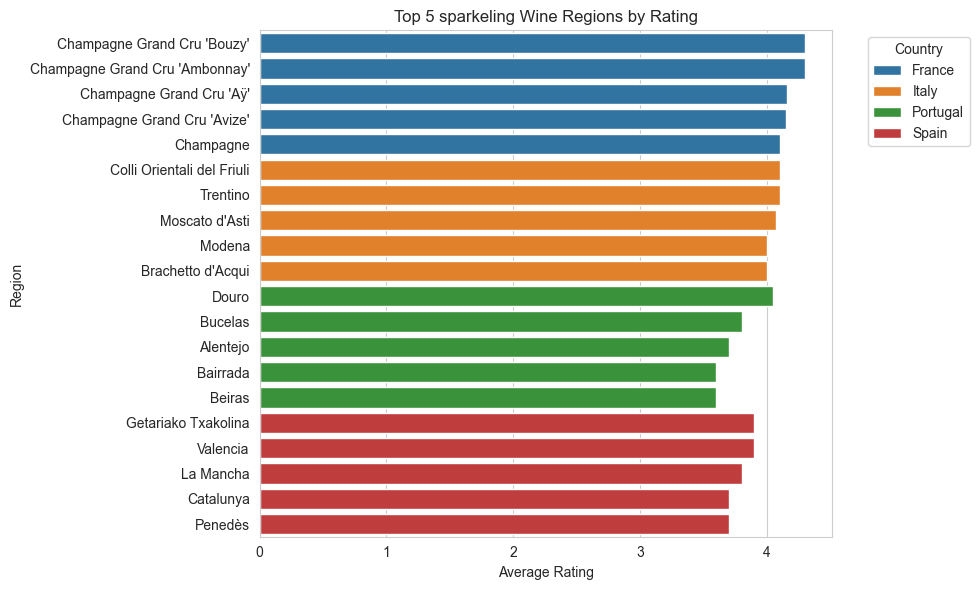

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_rating', y='region', hue='country', data=top_regions_per_country_spark)
plt.title('Top 5 sparkeling Wine Regions by Rating')
plt.xlabel('Average Rating')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('spark_rating.png')
plt.show()

Here we filter the top 5 regions by rating/price ratio for sparkling wines.

In [31]:
top_regions_ratio_country_spark = func.top_regions_ratio(avg_price_rating_per_region_spark)

Plot of top 5 regions by rating/price ratios for sparkling wines

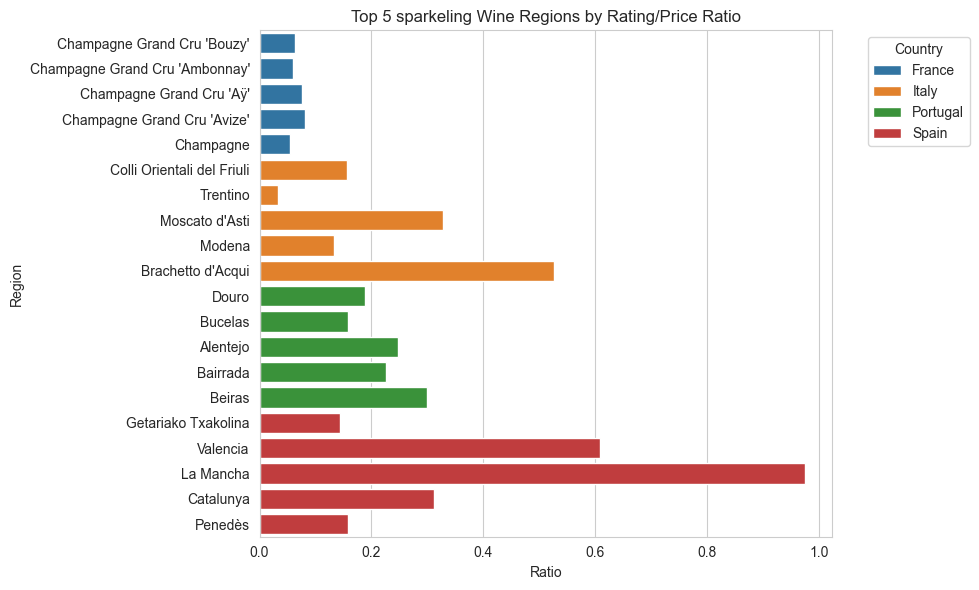

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='rating/price_ratio', y='region', hue='country', data=top_regions_per_country_spark)
plt.title('Top 5 sparkeling Wine Regions by Rating/Price Ratio')
plt.xlabel('Ratio')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('spark_ratio.png')
plt.show()

In the next function we compute all the average ratings of rose wines from the countries of interest.

In [33]:
avg_price_rating_per_region_rose = func.avg_and_ratio(df_rose, countries_of_interest)

Here we filter the top 5 regions by rating for rose wines.

In [34]:
top_regions_per_country_rose = func.top_regions_rating(avg_price_rating_per_region_rose)

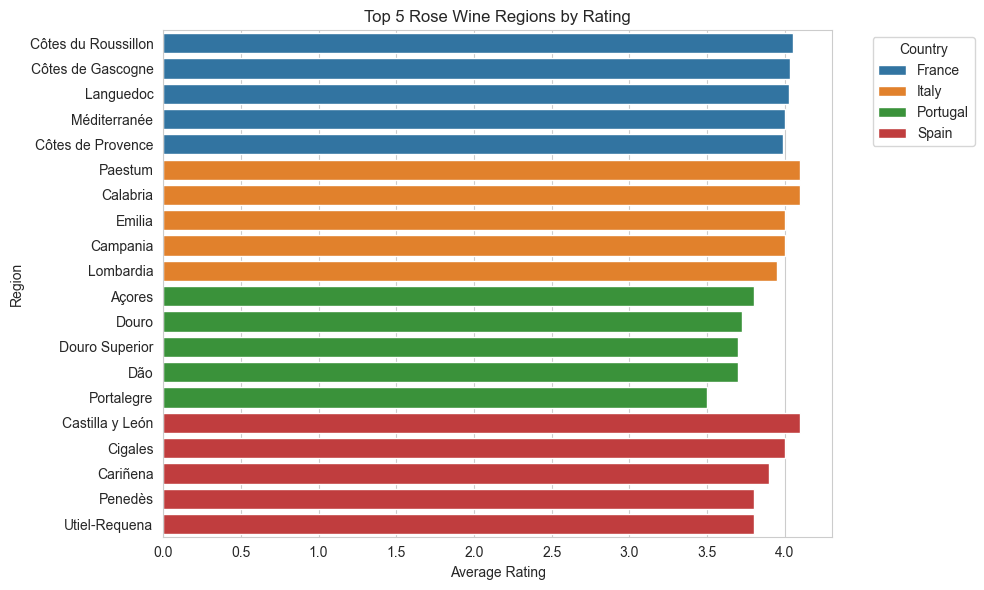

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_rating', y='region', hue='country', data=top_regions_per_country_rose)
plt.title('Top 5 Rose Wine Regions by Rating')
plt.xlabel('Average Rating')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('rose_rating.png')
plt.show()

Here we filter the top 5 regions by rating/price ratio for rose wines.

In [36]:
top_regions_ratio_country_rose = func.top_regions_ratio(avg_price_rating_per_region_rose)

Plot of top 5 regions by rating/price ratios for sparkling wines

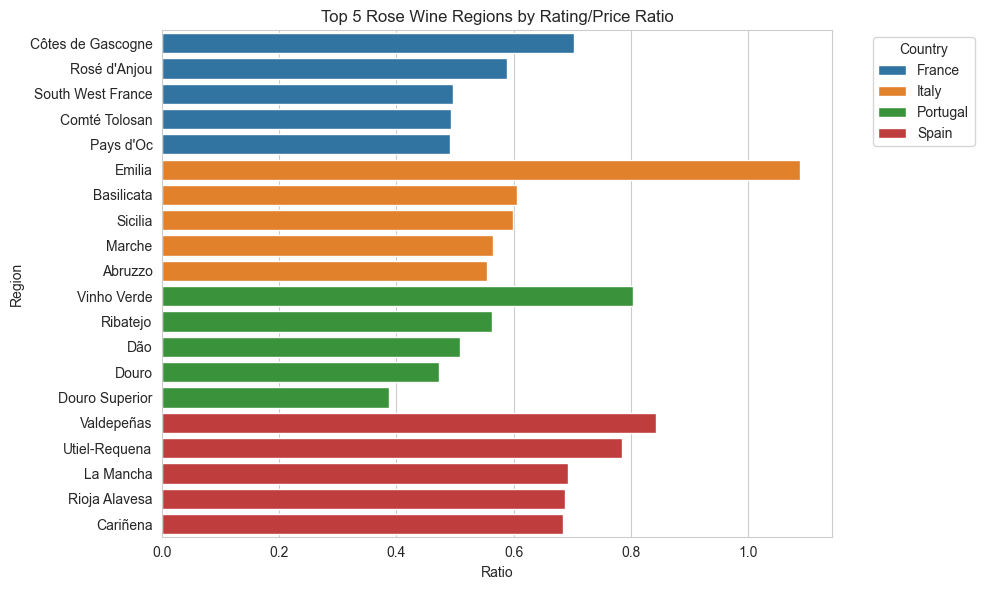

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='rating/price_ratio', y='region', hue='country', data=top_regions_ratio_country_rose)
plt.title('Top 5 Rose Wine Regions by Rating/Price Ratio')
plt.xlabel('Ratio')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('rose_ratino.png')
plt.show()